In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded=files.upload()

Saving Salary_Data.csv to Salary_Data.csv


In [4]:
import pandas as pd
Salary_Data=pd.read_csv('Salary_Data.csv')
Salary_Data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
Salary_Data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [6]:
Salary_Data.shape

(30, 2)

In [7]:
Salary_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
Salary_Data[Salary_Data.duplicated()].shape

(0, 2)

In [10]:
Salary_Data.drop_duplicates(inplace=True)

In [11]:
Salary_Data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [12]:
Salary_Data['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

In [13]:
Salary_Data['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [14]:
numerical_features = Salary_Data.describe(include=["int64","float64"]).columns
numerical_features

Index(['YearsExperience', 'Salary'], dtype='object')

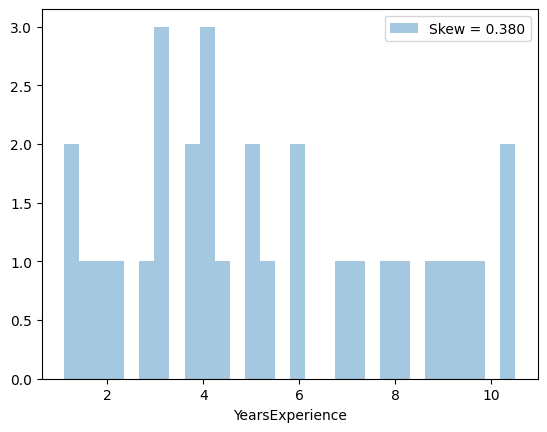

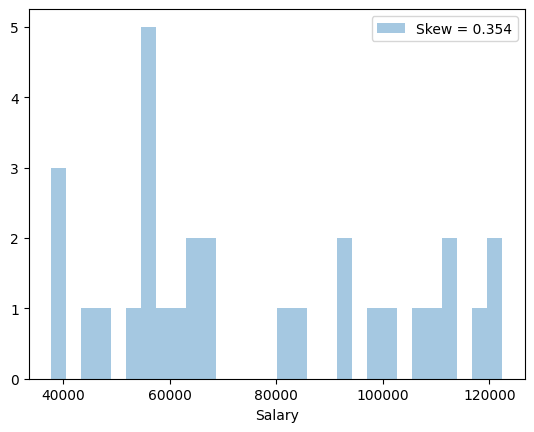

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in numerical_features:
    skew = Salary_Data[i].skew()
    sns.distplot(Salary_Data[i], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

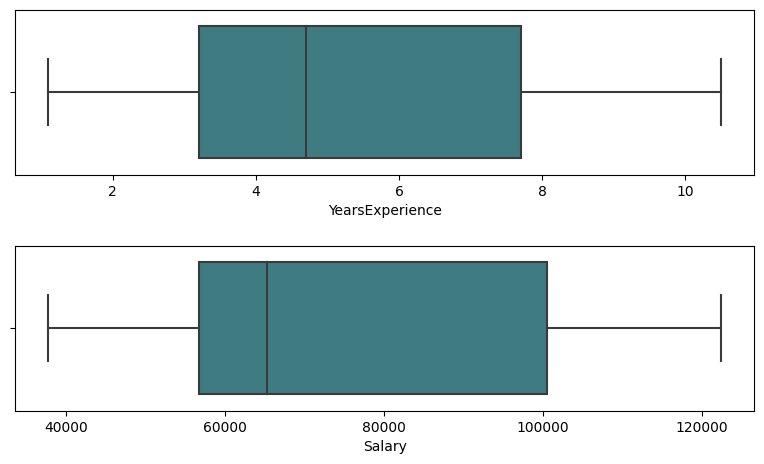

In [18]:
fig, axes = plt.subplots(2,1,figsize=(8,5),sharex=False,sharey=False)
sns.boxplot(x='YearsExperience', data= Salary_Data,palette='crest',ax=axes[0])
sns.boxplot(x='Salary',data= Salary_Data,palette='crest',ax=axes[1])
plt.tight_layout(pad=2.0)

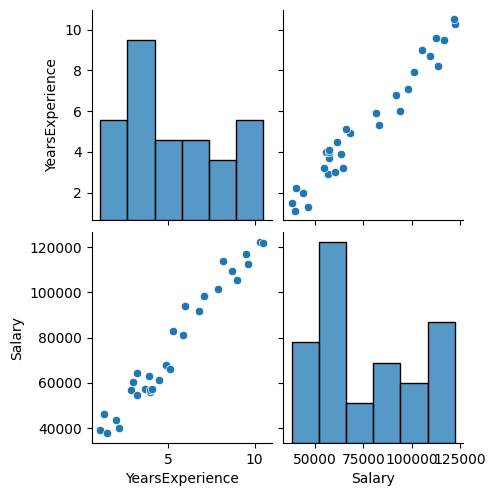

In [19]:
sns.pairplot(Salary_Data, palette='coolwarm')
plt.show()

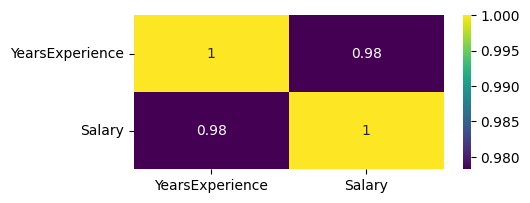

In [20]:
fig, ax = plt.subplots(figsize=(5,2))
sns.heatmap(Salary_Data.corr(), annot=True, fmt='.2g', cmap="viridis")
plt.show()

<Axes: xlabel='YearsExperience', ylabel='Salary'>

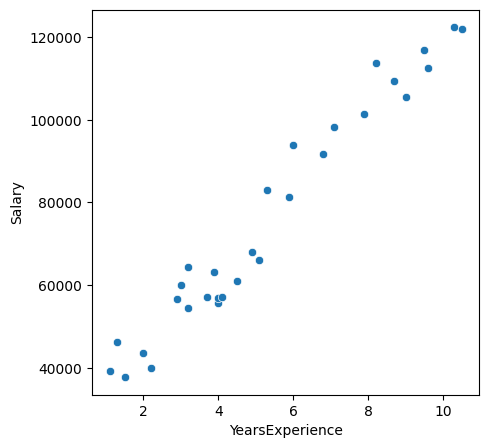

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='YearsExperience',y='Salary',data=Salary_Data,palette='Set1')

In [22]:
Salary_Data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<Axes: xlabel='Salary', ylabel='Density'>

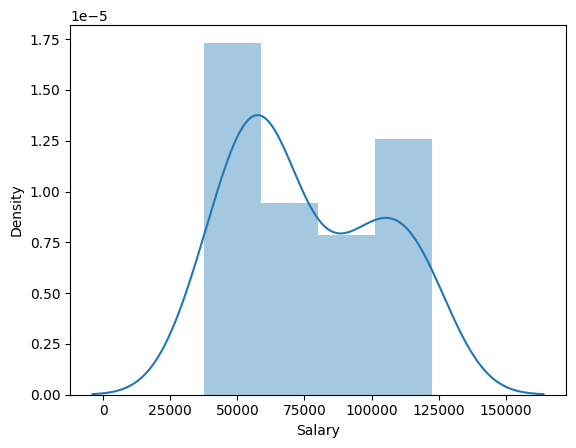

In [23]:
sns.distplot(Salary_Data['Salary'])

<Axes: xlabel='YearsExperience', ylabel='Density'>

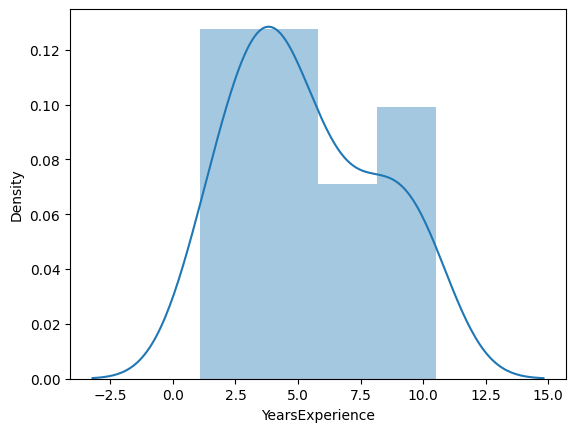

In [24]:
sns.distplot(Salary_Data['YearsExperience'])

In [25]:
import statsmodels.formula.api as smf

In [26]:
model=smf.ols('Salary~YearsExperience',data=Salary_Data).fit()

<Axes: xlabel='Salary', ylabel='YearsExperience'>

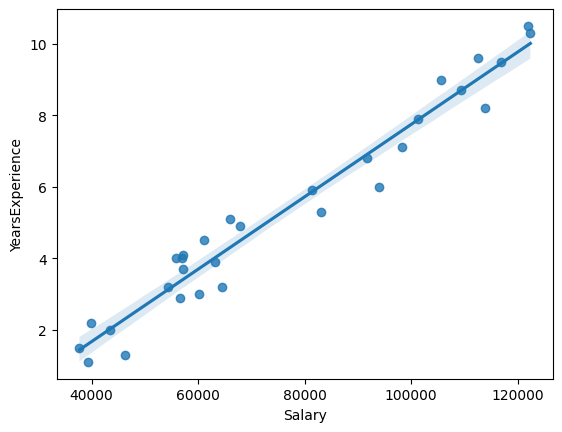

In [27]:
sns.regplot(x='Salary',y='YearsExperience',data=Salary_Data)

In [28]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [29]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [30]:
Salary_Data['Predicted']=model.fittedvalues
Salary_Data.head()

,YearsExperience,Salary,Predicted
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306


In [31]:
Salary_Data['Error']=model.resid
Salary_Data.head()

,YearsExperience,Salary,Predicted,Error
0,1.1,39343.0,36187.158752,3155.841248
1,1.3,46205.0,38077.151217,8127.848783
2,1.5,37731.0,39967.143681,-2236.143681
3,2.0,43525.0,44692.124842,-1167.124842
4,2.2,39891.0,46582.117306,-6691.117306


In [32]:
Salary_Data['Error_Sq']=(Salary_Data['Error'])**2
Salary_Data.head()

,YearsExperience,Salary,Predicted,Error,Error_Sq
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07


In [33]:
Mean_Squared_Error=(Salary_Data['Error_Sq']).mean()
Mean_Squared_Error

31270951.72228097

In [35]:
model.rsquared
#95.6% variation in the dependant variable is explained by the given independant variable

0.9569566641435086

In [36]:
model.pvalues
0.00000000000000000006016802

6.016802e-20